<a href="https://colab.research.google.com/github/SKC9372/Flask-ml-project/blob/master/Prescription_label_reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install paddlepaddle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00


In [2]:
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=d07e1ad68f658b9cb655bff43db840aacb67e5ce222a6f8eeef4ae5bf00e84fc
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [3]:
!pip install gTTS

In [20]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.0 MB/s eta 0:00:00


In [4]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 51288, done.
remote: Counting objects: 100% (355/355), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 51288 (delta 263), reused 335 (delta 257), pack-reused 50933 (from 1)
Receiving objects: 100% (51288/51288), 385.32 MiB | 18.06 MiB/s, done.
Resolving deltas: 100% (35939/35939), done.
Updating files: 100% (2392/2392), done.


In [34]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image,ImageEnhance,ImageFilter
import matplotlib.pyplot as plt

ocr_model = PaddleOCR(lang = "en",use_angle_cls = True)

[2024/09/29 06:16:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [35]:
import cv2
image_path = r'/content/pres_3.jpg'

(-0.5, 499.5, 335.5, -0.5)

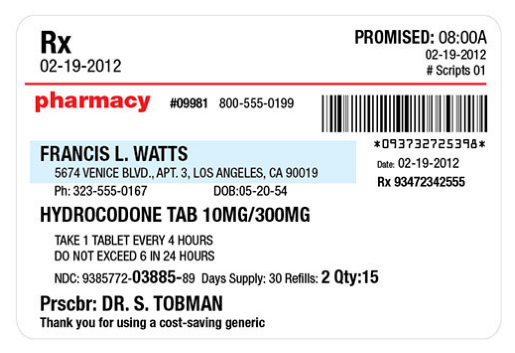

In [36]:
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')

In [37]:
img.size

(500, 336)

In [38]:
import numpy as np
def preprocess(image_path):
  image = Image.open(image_path)
  contrast = ImageEnhance.Contrast(image)
  image = contrast.enhance(0.7)
  sharpness = ImageEnhance.Sharpness(image)
  image = sharpness.enhance(2)
  plt.imshow(image)
  plt.axis('off')
  image_np = np.array(image)
  return image_np

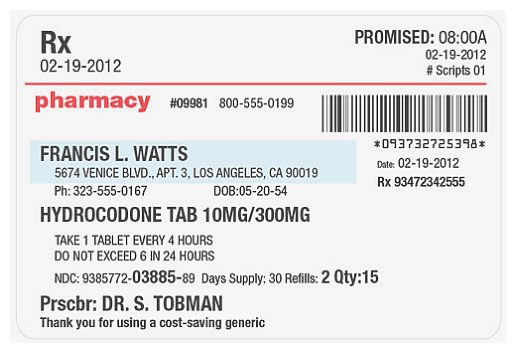

In [51]:
image = preprocess(image_path)

In [52]:
font = r'/content/PaddleOCR/doc/fonts/latin.ttf'

In [53]:
text = ocr_model.ocr(image, cls=True)

[2024/09/29 06:32:48] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.18320250511169434
[2024/09/29 06:32:48] ppocr DEBUG: cls num  : 20, elapsed : 0.11205744743347168
[2024/09/29 06:32:52] ppocr DEBUG: rec_res num  : 20, elapsed : 3.6523139476776123


In [54]:
text

[[[[[27.0, 19.0], [65.0, 19.0], [65.0, 48.0], [27.0, 48.0]],
   ('Rx', 0.9814565181732178)],
  [[[348.0, 19.0], [481.0, 19.0], [481.0, 37.0], [348.0, 37.0]],
   ('PROMISED:08:00A', 0.9608256220817566)],
  [[[417.0, 38.0], [481.0, 38.0], [481.0, 52.0], [417.0, 52.0]],
   ('02-19-2012', 0.9929403066635132)],
  [[[30.0, 49.0], [112.0, 49.0], [112.0, 64.0], [30.0, 64.0]],
   ('02-19-2012', 0.9928461909294128)],
  [[[419.0, 55.0], [480.0, 55.0], [480.0, 69.0], [419.0, 69.0]],
   ('#Scripts 01', 0.951388418674469)],
  [[[23.0, 83.0], [143.0, 83.0], [143.0, 104.0], [23.0, 104.0]],
   ('pharmacy', 0.9983930587768555)],
  [[[160.0, 87.0], [286.0, 87.0], [286.0, 102.0], [160.0, 102.0]],
   ('#09981 800-555-0199', 0.967880129814148)],
  [[[30.0, 136.0], [178.0, 136.0], [178.0, 151.0], [30.0, 151.0]],
   ('ERANCISLWATTS', 0.9561774730682373)],
  [[[365.0, 127.0], [481.0, 128.0], [480.0, 143.0], [365.0, 142.0]],
   ('*093732725398*', 0.9912828803062439)],
  [[[369.0, 148.0], [454.0, 148.0], [454.0,

In [55]:
def ocr_bboxes(image_path,ocr_output,font):
  image = Image.open(image_path)
  bbox = []
  text = []
  score= []
  for line in ocr_output:
    for i in range(len(line)):
      bbox.append(line[i][0])
      text.append(line[i][1][0])
      score.append(line[i][1][1])
  annotated = draw_ocr(image,bbox,text,score,font_path = font )
  plt.imshow(annotated)
  plt.axis('off')

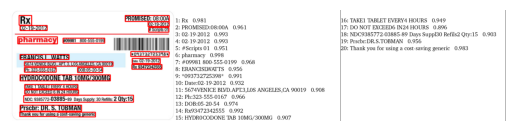

In [56]:
ocr_bboxes(image_path,text,font)

In [57]:
contain = ['mg','tablet','pills','quantity','qty','days','month','daily','hours','capsules']
output = []
for line in text:
  for i in range(len(line)):
    text = line[i][1][0]
    if any(word in text.lower() for word in contain):
      output.append(text)

In [58]:
final_text = ' '.join(output)

In [59]:
from gtts import gTTS
tt = gTTS(text=final_text, lang='en',slow=True)
tt.save("output.mp3")

In [60]:
final_text

'HYDR0CODONE TAB 10MG/300MG TAKE1 TABLET EVERY4 HOURS DO NOT EXCEED6 IN24 HOURS NDC9385772-03885-89 Days Suppl30 Refils2 Qty:15'

In [27]:
import numpy as np
def preprocess(image_path):
  image = Image.open(image_path)
  contrast = ImageEnhance.Contrast(image)
  image = contrast.enhance(0.7)
  sharpness = ImageEnhance.Sharpness(image)
  image = sharpness.enhance(2)
  image_np = np.array(image)
  return image_np
def text_extraction(image_path):
  image = preprocess(image_path)
  text = ocr_model.ocr(image, cls=True)
  contain = ['mg','tablet','pills','quantity','qty','days','month','daily','hours','capsules']
  final_text = []
  for line in text:
    for i in range(len(line)):
      text = line[i][1][0]
      if any(word in text.lower() for word in contain):
        final_text.append(text)
  return ' '.join(final_text)

def text_to_speech(text):
  tt = gTTS(text=text, lang='en',slow=True)
  tt.save("output.mp3")
  return "output.mp3"

def final_model(image_path):
  text = text_extraction(image_path)
  output = text_to_speech(text)
  return output

In [28]:
import gradio as gr
interface = gr.Interface(fn = final_model,
                      inputs = gr.Image(type = 'filepath'),
                      outputs = 'audio')
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://04c63af6eae08cee40.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


[2024/09/29 05:41:32] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/09/29 05:41:32] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.0723724365234375
[2024/09/29 05:41:34] ppocr DEBUG: rec_res num  : 20, elapsed : 1.5755090713500977


'output.mp3'

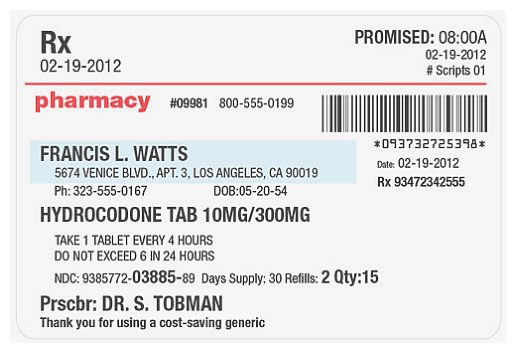

In [26]:
final_model(r'/content/pres_3.jpg')